In [1]:
#https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [2]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [3]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
os.listdir(datapath)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)
os.listdir(datapath)


['gdp_per_capita.csv', 'oecd_bli_2015.csv']

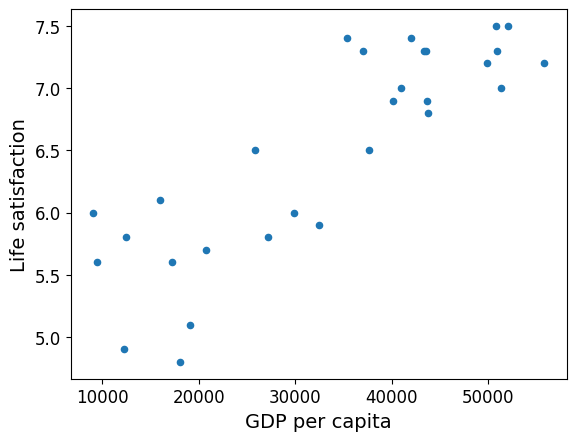

[[5.96242338]]


In [9]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [10]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [16]:
import numpy as np # linear algebra

import matplotlib as mpl # ploting
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression  # liner regression model
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)

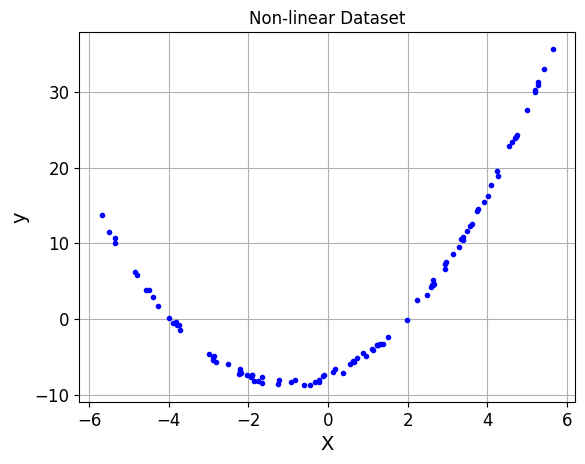

In [17]:
n = 100 # 100 data points
X = 12 * np.random.rand(n,1) -6
y = X**2 + 2 * X -8 + np.random.rand(n,1)

# plotting the dataset
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.grid(True)

In [18]:
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform(X) # convert the original feature to polynomial feature


# check the extened polynomial features of the first data point
print('original feature:', X[0])
print('polynomial features',X_ploy[0])

original feature: [5.42341852]
polynomial features [ 1.          5.42341852 29.41346845]


(array([-7.56432847]), array([[0.        , 2.00595992, 0.99905637]]))

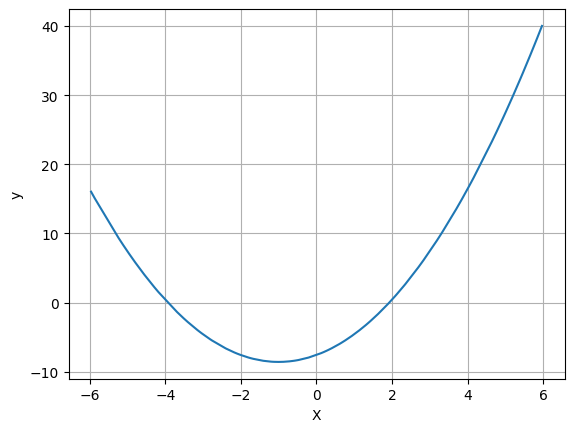

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
newX = np.sort(X,axis=0)
newY = lin_reg.predict(poly_features.fit_transform(newX))
plt.plot(newX,newY)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
lin_reg.intercept_, lin_reg.coef_ # check the bais term and feature weights of the trained model

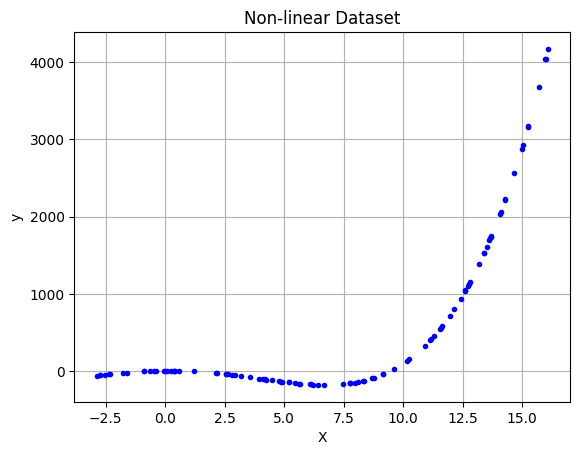

In [85]:
n = 100 # 100 data points
X = 20 * np.random.rand(n,1) -3
y = 0.1*pow(X,4) - 0.1*X*X*X -8.29*X*X + 2.499*X + 8.19 + np.random.rand(n,1)

# plotting the dataset
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.grid(True)

In [15]:
poly_features = PolynomialFeatures(degree=4) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform(X) # convert the original feature to polynomial feature


# check the extened polynomial features of the first data point
print('original feature:', X[0])
print('polynomial features',X_ploy[0])

NameError: name 'PolynomialFeatures' is not defined

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
lin_reg.intercept_, lin_reg.coef_ # check the bais term and feature weights of the trained model

(array([8.78204326]),
 array([[ 0.        ,  2.46356574, -8.29712932, -0.09846955,  0.09993917]]))

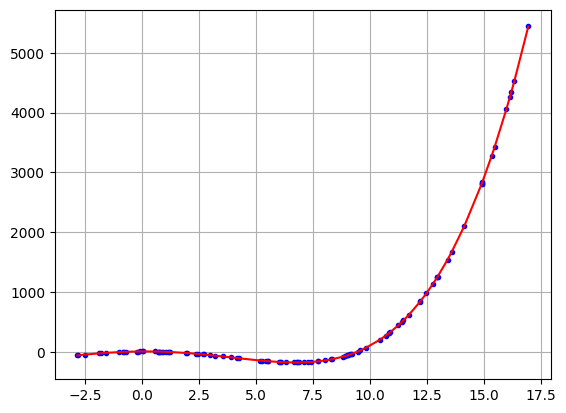

In [73]:
xToPlot = np.sort(X,axis=0)
yToPlot = lin_reg.predict(poly_features.fit_transform(xToPlot))
fig, ax = plt.subplots()
ax.plot(X,y,'b.', label = "training data samples")
ax.plot(xToPlot,yToPlot,'r-', label = "model prediction")
ax.grid(True)

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x1 = np.random.rand(100, 1) *10
x2 = np.random.rand(100, 1) *10
x3 = np.random.rand(100, 1) *10
x4 = np.random.rand(100, 1) *10
b = 15
a1 = 15
a2 = 7
a3 = 4
a4 = 8
y = a1*x1 + a2*x2 + a3*x3 + a4*x4 + b + np.random.randn(100, 1)

data = {
    "x1": x1.flatten(),
    "x2": x2.flatten(),
    "x3": x3.flatten(),
    "x4": x4.flatten(),
    "y": y.flatten()
}

X = pd.DataFrame(data, columns = ["x1", "x2", "x3", "x4"])
Y = pd.DataFrame(data, columns = ["y"])

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)


multipleLinearRegression = LinearRegression()

multipleLinearRegression.fit(xTrain, yTrain)
print(multipleLinearRegression.coef_)
print(multipleLinearRegression.coef_[0][0])
print(multipleLinearRegression.coef_[0][1])


[[14.9199565   7.00386867  4.07053859  8.01359065]]
14.919956502887091
7.003868669411747


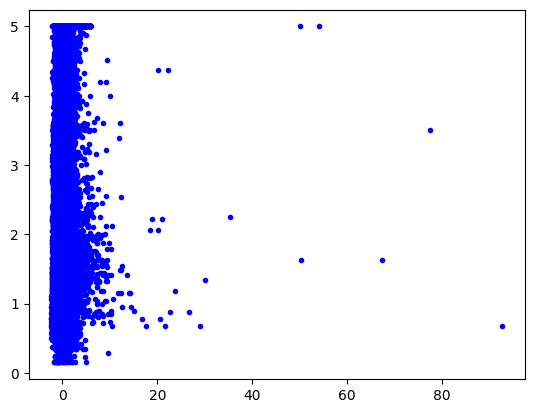

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


ca_housing = fetch_california_housing()
X = ca_housing.data
Y = ca_housing.target



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

lasso = Lasso()

lasso.fit(x_train, y_train)

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'b.', label = "training data samples")
